# Abstract
Arctic new particle formation is an import source of cloud condensation nuclei which in turn affects cloud properties. Insights into the drivers of new particle formation in a changing Arctic climate are important, as clouds in this region contribute to further warming of an already vulnerable environment. Sea ice extent in the Greenland and Barents Sea has been observed to be anticorrelated with new particle formation event frequency at the Zeppelin Observatory at Svalbard, but the underlying processes are complex, and the question is whether this continues to hold true for more recent years. In this work, DMPS and CPC data from Zeppelin between 2010-2020 as well as satellite data on sea ice and chlorophyll concentration was used to evaluate this. The correlation between new particle formation and sea ice concentration is investigated, and different methods are tested to identify a suitable indicator for detection of new particle formation events in the size distribution data. K-means cluster analysis was chosen in order to compare with the results from 2000-2010 obtained in a previous study. K-means clustering was used on the data to partition it into distinct and separate clusters based on the shape of the normalized aerosol particle number size distributions. Our results indicate weak trends in the May-June-July occurence for all clusters between 2010 and 2020. Furthermore, the results suggest that there is no correlation between the annual new particle formation frequency and sea ice concentration in the Greenland and Barents Sea for the years 2010-2017, which differs from previous observations at Zeppelin between 2000-2010. Further investigations utilizing for example air mass trajectory analysis and suitable new particle formation indicators are needed to obtain a more complete understanding of the complex interplay between new particle formation drivers. 

# Acknowledgements

First and foremost, I would like to acknowledge the providers of the data sets OSI-SAF consortium (sea ice data) and OBS-ESACCI-OC for chlorophyll data, and the Norwegian Polar Institute (NPI) for running the Zeppelin station and EBAS for managing the database. 

I collaborated with Kei Tsuruhara and our supervisor Dominic Heslin-Rees. I am very thankful to be part of this team, it has been inspiring (and fun!) to work with both of you. In this report Kei has produced the sea ice data (it was not easy to work with that dataset!), Dominic provided the DMPS and CPC data as well as some functions to read in and do the basic preparation of data. Other than that, I have received tremendous amount of help and advice while learning Python (and data analysis in general) from especially Dominic but also from other course instructors. Thanks Paul Zieger for your enthusiasm and great advice on things to look more into. Thanks to Linn Karlsson whose work in a previous version of this course happened to include a great function to integrate log-normal distributions.


# Introduction

The Arctic has experienced much faster rates of warming than other parts of the globe. The response to increased temperature in the Arctic environment is manyfold and implies drastic changes to of the whole environment and ecosystems. Drastic reductions in sea ice cover during the summertime is one key manifestation of the changes taking place (Perovich et al., 2018).  The Arctic becoming more biologically productive, and the increased emissions of aerosol precursor gases, is another example of changes taking place (Galí et al. 2019). 

The Arctic annual cycle of airborne particulate matter properties is largely the result of variations in meteorological conditions and dominating sources (Tunved et al. 2013). During polar night, ocean and air circulation patterns imply an influx of anthropogenic pollutants, and the aerosol size distribution is dominated by accumulation mode particles. In combination with the Arctic wintertime meteorological conditions, this leads to the formation of a persistent Arctic haze. As the sun gradually returns, the circulation and airmass transport patterns change and restrict the anthropogenic pollution inflow so natural sources dominate. Formation of low-level clouds during summertime, which leads to removal of accumulation mode particles by wet scavenging, marks the end of the Arctic Haze period. Consequently, the composition, properties, and size distribution of Arctic aerosol particles change. The lower aerosol loading and increased availability of sunlight promotes photochemistry which results in a summertime peak of aerosol particles smaller than 100 nm (Schmale & Baccarini, 2021). 

New particle formation (NPF) plays an important role in the Arctic radiation budget as the newly formed aerosol particles may grow to cloud condensation nuclei’s (CCNs), and subsequently activate into cloud droplets. In short, NPF at Svalbard has been described as the result of photo-oxidation of volatile gases emitted from for example the ocean, soil and snow into low-volatility aerosol precursors (Beck et al., 2021). When aerosol loadings and thus condensation sinks are low, the low volatile gases may undergo self-nucleation to form new particles. Cloud formation may during summer in the high Arctic be CCN limited (Mauritsen et al., 2011), and the production of particles from NPF events has in global modelling studies been shown to contribute to the majority of CCNs in the Arctic (Gordon et al., 2017). Low-level clouds influence the Arctic radiation budget, and likely contributes to amplified warming (Schmale & Baccarini, 2021), which makes studies of NPF event frequency and drivers important.

At the Zeppelin Observatory on Svalbard, long-term measurements have been conducted to monitor the properties of aerosol particles. Long-term measurements are valuable to monitor the changes taking place in a sensitive Arctic environment. Data from eleven years of DMPS measurements (2000-2010) at the Zeppelin station have been used to investigate the hypothesis that Arctic sea ice reduction in the Greenland and Barents Sea leads to an increase in the frequency of NPF events at Zeppelin (Dall'Osto et al. 2017). The question this project makes an attempt to answer is whether this is a causal effect, if this hold true for subsequent years and if trends in proxies for the productivity of oceans might be driving NPF as well. Another aim is to partly reproduce the Dall'Osto paper for a later time period by applying a similar methodology with regards to NPF identification in the DMPS data, as well as to investigate other possibilities for NPF identification. We (as a group) use satellite data on sea ice and chlorophyll concentration and aerosol size distribution and number concentration data from Zeppelin. This report focuses on the analysis of the DMPS and CPC data, with some use of annual sea ice concentration data for the Greenland and Barents Sea.


# Method

## Datsets

The Arctic measurement station Zeppelin Observatory is located on Svalbard, which is situated between the Greenland and Barents Sea. We have used level 2 Differential Mobility Particle Sizer (DMPS) and data from two different Condensation particle counters (CPC) from the Zeppelin Observatory, provided by our supervisor Dominic Heslin-Rees, and satellite retrieved sea ice concentration from OSI-SAF and satellite chlorophyll observations OBS-ESACCI-OC. The DMPS and CPC data encompass the years 2010-2020 with overall high data coverage, with a 30 min resolution. Starting date for the DMPS and CPC data was 2010-08-03 and the end date was 2020-12-31 with a total data coverage of 66% ( = 60439 h/912996 h) in terms of hours. Data coverage is therefore something that needs to be accounted for when calulating the NPF frequency. The satellite data was processed by Kei and DMPS and CPC data is the focus of this report. 

The DMPS measures the particle number size distributions for particles smaller than 1000 nm. The DMPS scans over different sizes and measures the number concentration (#/cm$^3$) in each size interval, or bin. The size range covered by the DMPS is 5-708 nm. The output is in the form of log normal particle concentration (i.e. dn/dlogDp) which accounts for the difference bin bin width. 

A CPC counts particles in the sub micrometer range and provides the particle number concentration (#/cm$^3$). Data from two different CPCs was used, the UFCPC (ultrafine CPC) and the CPC 3010. The UFCPC has a particle diameter threshold at 3 nm which in comparision with the CPC3010 whose lower threshold is at 10 nm.
 

## Import packages

And make sure that functions are auto-updated.

In [1]:
import DMPS_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc
import glob 
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
import scipy.stats as st
import seaborn as sns
from matplotlib import cm

# Auto-update the functions. Useful if the functions have been altered. 
%load_ext autoreload
%autoreload 2

plt.rcParams['font.size'] = '12'

In [2]:
# Defining the path containg all DMPS data
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
# Using glob to import the files in the specified path
fu.importData(path)

Loading each year of 30 min resolution DMPS data into a dataframe and create a list containing all dataframes.
Column headings are added, and data flagged as invalid is removed.

In [4]:
DFs_DMPS = fu.load_and_append_DMPS(path, 
                             name_in_file='DMPS')

## Concatenate DMPS data 
The DMPS data comes in several files and must be concatenated into a common dateframe, and unnecessary columns are dropped.

In [5]:
df_DMPS = fu.concat_df_DMPS(DFs_DMPS)

Useful variables are defined using column headings renamed to ease calling of specific columns.

In [6]:
# Get a list with the DMPS bin column names as strings and floats to call column in dataframe and for calculations.
bin_col_list = fu.get_bin_column_string_list()
bin_cols = fu.get_bins(bin_col_list)
bin_cols = [float(x) for x in bin_cols]

# Rename the column headings for midpoint diameters to numeric values with less decimals.
df_DMPS = fu.renameDpColumns(df_DMPS, bin_col_list)

# Make a list of all the "real" non-rounded midpoint diameters as a list and as array.
diameterList, diameters = fu.getFloatDiameterListAndArray()

# Make a list of diameters as string-objects
diameters_as_strings = [str(x) for x in diameters]

## Resampling to hourly averages 
The function ``resample`` was used to convert the 30 min DMPS particle size distribution data to a dataframe containing the 1 hour average. The python function ``resample`` fills the gaps in the data by adding rows for gap days/months/hours with NaN-values to get a continous dataset. Because of this, rows containing only NaN values are dropped. 

In [7]:
df_hourly_2010_2020_mean  = df_DMPS.resample('H').mean()
df_hourly_2010_2020_mean  = df_hourly_2010_2020_mean.dropna(how='all')

The first two columns in the dataframe contain data from two different CPCs, i.e. condensation particle counters which count particles and yield the particle concentration in #/cm$^3$. The third colum Ntot contains the total particles number concentration as computed by the DMPS. The rest of the columns specify the midpoint size (nm) of the bins for which the values indicate the log-normal distribution. The last column contains flags indicating the validity of the data. Invalid data was removed by the ``concat_df_DMPS`` function.   

## Identifying NPF events

One of the aims of this report is to conduct a brief investigation of different methods to identify NPF events. Some different methods are tested to identify the NPF events:

* By calculating $\frac{N_{D_p<X}}{N_{tot}}$ 
* By using K-means clustering
* By calculating the difference between the UFCPC and the CPC 

Below the methods are decribed in more detail.

### Method 1: Using $N_{D_P <X}/N_{tot}$ 

The motivation to use the first metod is that in the event of NPF, there will by a drastic increase in number concentration of particles in smallest size bins, and the ratio of particles in the smaller bins to larger size bins should be elevated. This requires that the total number concentration $N_{tot}$ is calculated in the full diameter range, and $N_{D_P< X}$ up to a certain diameter $X$. $X$ was chosen to 25 nm to cover the full nucleation mode range (Seinfeld & Pandis, 2008). To do this, the log-normal distribution which is provided by the DMPS has to be integrated. Linn Karlsson (e-Science course participant 2017) should be acknowledged for great inspiration to the method used in this work (Linn's method involved the use of dictionaries but here arrays are used instead).  

The ``calcNtot`` function calculates the particle concentration by integrating in a given bin midpoint diameter interval ``diameters`` and adds a column in the returned dataframe containing the calculated values.

In [8]:
# Calculate the total particle number concentration for the 1 h resolution data
df_hourly_2010_2020_mean_ntotCalc  = fu.calcNtot(diameters, df_hourly_2010_2020_mean,diameters_as_strings) 

In Figure 1, the result from the integration of the full size distribution is compared to Ntot given in the DMPS data, and they appear to be in good aggrement (slope of 1 and $R^2$ close to 1), hence we know that this integration method works. 

R-squared: 0.999363
Intercept: 0.0445901316076629
Slope: 1.0004705430431775


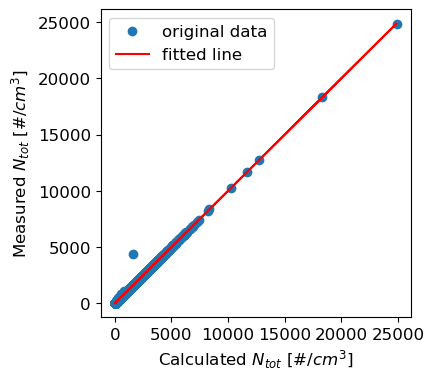

In [9]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

fu.compareIntegration(varx,vary)

**Figure 1. Comparison of the integrated total particle number concentration and the total particle number concentration given by the DMPS.**

### Method 2: K-means clustering

The second approach to identify NPF events involves K-means clustering (using ``sklearn.cluster.Kmeans`` (Pedegrosa et al., 2011)) of the long-term DMPS dataset which is an unsupervised machine learning algorithm. In short, unsupervised machine learning as opposed to supervised, involves data without labels and the data is grouped based on similarity of the data. This approach was previously deployed by Dall'Osto et al. (2017) to identify NPF events from size distribution data at the Zeppelin, and therefore it is interesting to try the same approach. Clustering of data implies grouping similar objects together based on different features of the data. The K-means algorithm means that the data is divided into to a user defined number of clusters ($k$). The K-means algorithm starts by picking k random datapoints and assigns them as centers of the cluster (centroids). Then the distance of the other data points to the centroids are calculated and they are assigned to the nearest cluster centroid. Then the process of assigning new centroids starts over and the data is reassigned. This process is then repeated several times until the final clusters are established.  

Following the approach of Dall'Osto et al. (2017), we cluster according to the shape of the distribution. Prior to applying the K-means clustering the size distribution data must therefore be normalized, and the optimal numbers of clusters needs to be determined. By normalizing the data, features that signify NPF events may be lost such as a high number concetration in the nucleation mode compared to other modes. However, clustering the non-normalized data resulted in clusters that were deemed unreasonable. 

In [10]:
df3, df_daily_2010_2020_1h_mean_norm = fu.create_normalised_df(df_hourly_2010_2020_mean)

For the hourly averaged data some endpoint columns where dropped in order for the clustering to work reasonably. Normally particle number concentrations are low in the end bins, and by dropping them it is reasonable to assume that the overall size distribution shape should be preserved. Furthermore, we are mainly focused on the smallest particles and hence the two biggest size bins should hopefully not affect our results as much. 

In [11]:
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

#### Optimizing the number of clusters 

The optimal cluster number *k* for K-means clustering needs to be decided upon. This could be done using several methods. Here the inertia method and the average silhouette score is used. 

The inertia method implies calculating the mean squared distance of each cluster to its nearest centroid. As a rule of thumb, a good clustering model has a low inertia and low number of clusters. If *k* equals the number datapoints, the inertia equals zero, so while choosing the optimal *k* there is a trad eoff between inertia and number of clusters. To find the optimal *k* the elbow in the inertia vs $k$ is identified, where the increase in *k* implies a slower decrease in inertia. 

The Silouette score generates a number between -1 and 1. The closer the Silouette score is to 1, the better cluster are distinguished from each other. A score of 0 implies that clusters are not well distinguished and -1 that clusters are wrongly assigned. Here, the average silouette score is computed which informs on the average separation of all clusters. Ideally the Silouette score is calculated for individual samples as well (out of the scope of this work) to optimize the choice of *k*.

Optimization was done for varying *k* between 2 and 13 clusters. In Figure 2 the inertia and average Silhouette score are shown as a function of the number of cluster (*k*).


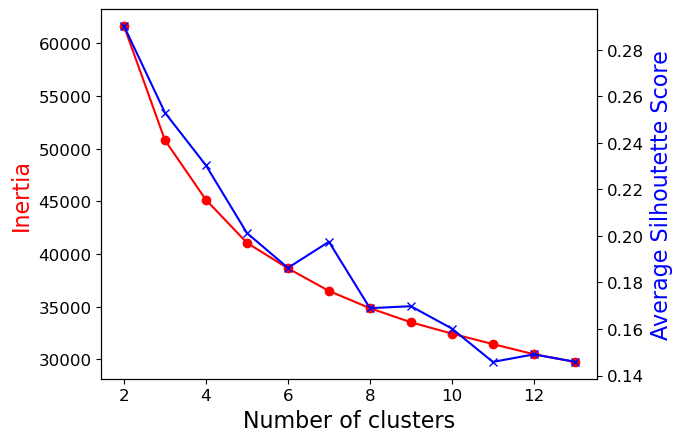

In [12]:
fu.optimizeClusters(df_hourly_norm_dropped)   

**Figure 2. The inertia (left y-axis) and average silohouette score (right y-axis) versus the number of clusters.**

From the inertia method it is not straightforward to define the elbow, where adding more clusters results in a minor decrease of inertia. It is clear that the average silhoutette score of the clusters decrease with increasing number of clusters.

The optimal cluster number was here decided to *k* = 5, rather than 4 as inertia decrease less for each added cluster when *k* > 4. Six clusters did not improve the silouette score and five clusters is preferred over seven as inertia is higher when *k* = 5. 

#### Method 3: Utilizing the different CPCs 
The last method to identify the NPF events involves taking advantage of the different detection limits of the UFCPC (3 nm) and CPC3010 (10 nm) that were provided in the dataset, in addition to the DMPS data. Two different approaches where tested: taking the absolute difference between the instruments and by computing the ratio of measured concentrations.


# Results

## K-means clustering 

The clustering was performed using $k$ = 5 clusters. 

In [13]:
# Optimal cluster number 
n_clusters = 5

#Perform K-means clustering
silhouette_avg_1h, inertia1h, df_norm_clustered_1h_mean = fu.perform_clustering(df_hourly_norm_dropped, n_clusters)

# Define the unique number of size distribution clusters in the sence that peak diameter is different.
clusters = np.unique(df_norm_clustered_1h_mean['clusters'].values)

# Check that the number of clusters resulting from the clustering procedure is equal to the variable ``n_clusters``, 
# i.e. that the peak diameters of the clustered size distributions are unique. Print result.
fu.checkUniqueModeDiam(df_norm_clustered_1h_mean,n_clusters)

OK! Clusters peak for different diameter when number of clusters =  5


Each hourly distribution was assigned a cluster ID during the clustering. The mean, standard devitation, median, 10- and 90-percentiles of the clustered data were calulated for each cluster in order to visulize the results of the clustering procedure. 

In [14]:
df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

df_norm_clustered_1h_mean_mean   = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std         = df_norm_clustered_1h_mean.groupby('clusters').std()

In Figure 3, the median and 10-90 percentiles (shaded area) of the normalized and clustered size distribution data is shown. The mean is plotted as dotted lines for comparison. From the graph it is clear that median and mean are similar. From these results we suspect that cluster 1 and 2 may represent NPF related sizedistributions, although both 1 & 2 are bimodal and extend to the accumulation mode. Varying the cluster number did not remove the bimodality for the clusters whose normalized distributions peak occurs for $D_p$ < 30 nm. It could be speculated that other sources of aerosols may be contributing to NPF related clusters such as forest fires or biomass burning. Moreover, clustering mean and median daily distributions using 5 clusters displayed high similarity with the clusters shown below (daily clustering is not shown here).  

Comparing the results of our clustering analysis with that of Dall'Osto et al. (2017) and their daily mean clusters a few qualitative observations could be made. Firstly, two of the clusters classified as NPF indicators nucleation or bursting by Dall'Osto et al. (2017) which peak at 10 nm or lower, are most similar to our cluster 1 (however, in that paper their normalized clusters were not plotted alongside each other which make an absolute comparison difficult). These clusters also have tails extending into the accumulation mode although the bimodality is absent or not as pronounced in our hourly (nor daily or median) clusters. It should also be mentioned that their third NPF indicator cluster (nascent) partly shows similarity with our cluster 3 on the left hand side of the peak, although our cluster 3 appears to be a superposition of two modes and therefore we disregarded this cluster as an indicator of NPF. 

Lastly, the accumulation mode clusters (cluster 4 and 5) in our analysis differ from the two accumulation mode clusters identified by Dall'Osto et al. in the sense that also display bimodality which was not the case in their study.

There is some doubt as to whether the clustering method actually captures the NPF events correctly. In general, it seems as though the method works well at displaying the average seasonality of the overall size distribution (see Figure S1 and S2 in the Supplement). At least cluster 1 appears to be related to NPF, but additional validation is needed.


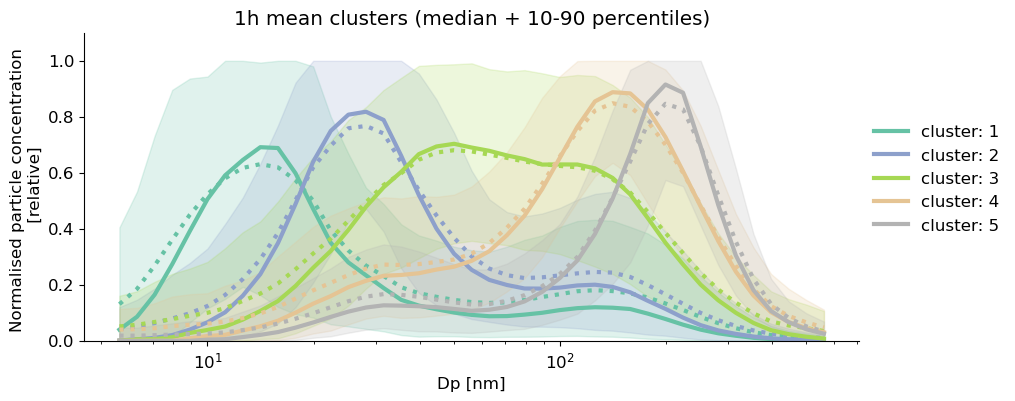

In [15]:
fu.plotClustersNormalized(df_norm_clustered_1h_mean, diameters,
                           df_norm_clustered_1h_mean_mean,
                           df_norm_clustered_1h_10q,
                           df_norm_clustered_1h_90q,
                           df_norm_clustered_1h_mean_median)

**Figure 3. The resulting mean (solid line) and standard deviation (shaded) normalized sizedistribution clusters for $k$ = 5. The median is shown as a dotted line.** 

## Comparison of NPF indicators

To make a simple comparison between the three methods used to identify NPF events (CPC-approach, integration method and clustering) the annual cycle of the three proxies is shown below in Figure 4. 

In the top panel the results from the absolute difference CPC method are shown, and mid panel shows the difference between the CPCs. For some instances one of the CPC's appears not have been in operation as it showed zero values while the DMPS and the other CPC were in operation. Therefore for these occasions where one CPC equals zero, the data is excluded. In the midpanel the integration method results for a diameter threshold diameter of 25 nm is shown, and indicated by the black dashed line, and the shaded area shows the 10 and 90 percentiles of the data. Note that this variable is plotted on the right y-axis. In the lower panel, the annual cycles are plotted as the normalized occurrence of the five cluster (in terms of the number of hours divided by total number of hours each cluster is present each month) is shown. The clusters deemed likely to represent NPF related size-distributions (cluster 1 and 2) are highlighted. 

From the results in the top panel the absolute difference between the CPCs indicates a reasonable annual NPF cycle (and one similar to that of cluster 1, 2 and 3). The same goes for taking the difference between the CPCs (mid panel). However, the spread in the data is large in terms of standard deviaions and percentiles. 

It can be observed that the results from the integration method ($N_{D_P <X}/N_{tot}$) in the mid panel display an annual cycle not typically associated with NPF events at Zeppelin as shown in previous studies (Dall'Osto et al.,2017; Tunved et al., 2013). Its annual trend indicates a peak in the polar night months associated with Arctic haze and therefore this method is discarded. Taking the ratio between the UF CPC and normal CPC to identify NPF was also discarded (not shown here) as taking ratios of very small numbers leads to uncertainty. Another important conclusion is that the integration method was not successful for the choice of thresholds equal to either 10,20 or 30 nm (only 25 nm is shown). 

Regarding the annual trends of the clusters in the lower panel of Figure 4, it can be observed that cluster 1, 2 and 3 exhibits annual trends expected for NPF events. However, cluster 3 depict a similar trend although it was discarded as NPF related due its very broad size distribution (see Figure 3). The accumulation mode clusters (4,5) however follow the expect annual cycle related to the Arctic Haze phenomenon. 

The rest of the project will focus on the clusters to ease comparision with the previous results of Dall'Osto et al. (2017).

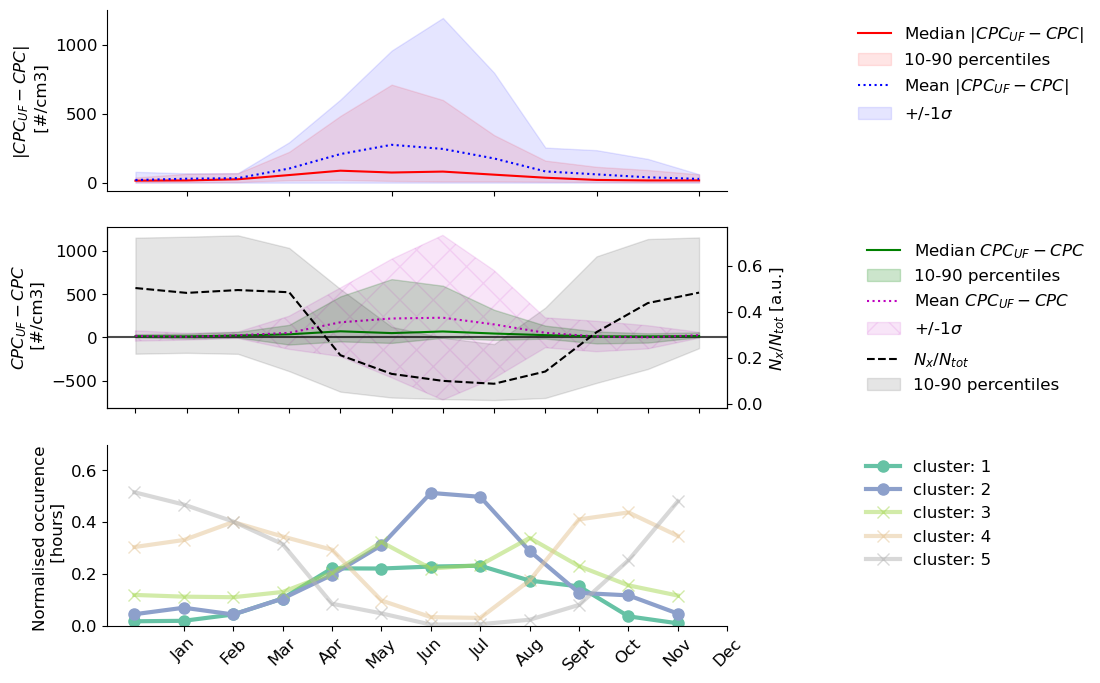

In [16]:
# Input DFs, clusters, threshold = 10 nm for when to integrate
fu.plotNPFproxys(df_hourly_2010_2020_mean,
                 df_norm_clustered_1h_mean,
                 clusters,bin_cols,25,
                 diameters,diameters_as_strings)

**Figure 4. Top panel: The annual cysle of the absolute difference between the UF CPC and CPC 3010. Mid panel: The left axis shows the annual cycle of the difference between the UF CPC and CPC 3010. The right axis shows the results of integrating up to a certain threshold diameter (here 10 nm was chosen). Lower panel: The annual cycle of size distribution cluster 1-5.**

The annual frequency distribution of the clusters is displayed in Figure 5 as a normalized stacked bar plot of clusters over the studied years (2010-2020). During the summer months, cluster 1,2 and 3 dominate as opposed to the polar night months where the accumulation mode clusters dominate. This strengthens the assumption that cluster 4 and 5 are indicators of Arctic haze and anthropogenic influence (Schmale & Baccarini, 2021; Tunved et al. 2013). It is evident that cluster 1 and 2 dominate during the summer months. Cluster 3 (not chosen to indicate NPF) appears to follow a similar trend although it is present to higher degree than especially cluster 1 in wintertime. However, cluster 3 remains excluded as an NPF proxy due to the shape of its size distribution.

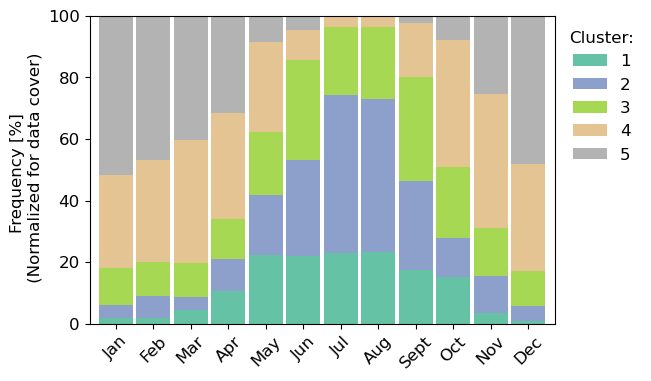

In [17]:
fu.makeStackedPlot(df_norm_clustered_1h_mean,clusters)

**Figure 5. The annual frequency distribution of size distributions cluster 1-5.**

## Trend for NPF events

From the previous results, it can be concluded that the clustering presents the best choice in comparison to the other methods to study trends in NPF at Zeppelin. Potentially it could be interesting to study the trend over the years for the different clusters. However, such analysis excludes taking into account variation in NPF drivers such as meteorological conditions or variations in NPF precursors or other processes affecting the sources of these such as sea ice extent. We normalized the cluster frequencies to account for data coverage so that cluster occurrence would not be biased. 

First the monthly occurrence needs to be determined for each year and cluster. To ease handling of the dataframes, ``df_clusters_seqMonth_T`` is the transposed version of ``df_clusters_seqMonth`` which contains one row for each sequential month in the dataset, and columns for all the clusters where the normalized occurrence of each cluster is given. The total cluster count for each month is also given in a separate column.

In [18]:
df_clusters_seqMonth, df_clusters_seqMonth_T = fu.prepareDFforTrendPlot(df_norm_clustered_1h_mean,clusters)

The function ``makeDFforTrend``  takes the ``df_clusters_seqMonth_T``, a list of the months of interest and the cluster, and returns a normalized count dataframe for each month and cluster. The months May to July where chosen as this is the time for when the satalitte-retirieved chlorophyll has its annual peak (see Kei's project). 

In [19]:
# Define the period of interest in terms of months
MJJ_list = [5,6,7]
all_months_list = [1,2,3,4,5,6,7,8,9,10,11,12]

df_norm_MJJ = fu.makeDFforTrend(df_clusters_seqMonth_T,MJJ_list,clusters)
df_norm_all = fu.makeDFforTrend(df_clusters_seqMonth_T,all_months_list,clusters)

In Figure 6 below, the Theil-Sen slope and the uncertainty in the slope (95% confidence interval) is plotted which indicates the trend for the months May, June and July for all clusters between the years 2010 and 2020.  The Theil-Sen slope is a non-parametric method to discern trends which is best suited for periods which do not contain any seasonality. Non-parametric implies that it is robust towards non-normally distributed data. By selecting for a specific season, there is no influence from seasonality that would interfere with trend estimations, i.e. all autocorrelation is removed. 

For cluster 1, 4 and 5 we observe a weak decreasing summertime trend of about 1, 0.4 and 0.6% per year. Cluster 2 and 3 has on the other increased by 0.7 and 0.8% yearly. 
At the beginning of the data set the approximately 27% of the summer observations consists of cluster 1 type size distributions, and at the end of the period (110 months that ends in 2010) about 16%. 
Cluster 2 composes at the start 27% of the summertime clusters, wheras in the end it accounts for 38% of the observations. 

Cluster 3 has increased its share of the summertime clusters from about 18% to approximately 29%. Cluster 4 and 5 consituted from the start about 15 and 7% of the observations whereas in the end, the estimated slope suggests that their respective share remained constant (cluster 4) or close to zero (cluster 5).  

No obvious trend can be discerned for any of the clusters, although the data display a varying degree of spread. The trends in satellite data for chlorophyll and sea ice (Kei's work) were shown to be spatially heterogenous for this period. To fully explain the results, additional information is needed, such as airmass origin or trends in aerosol precursors.

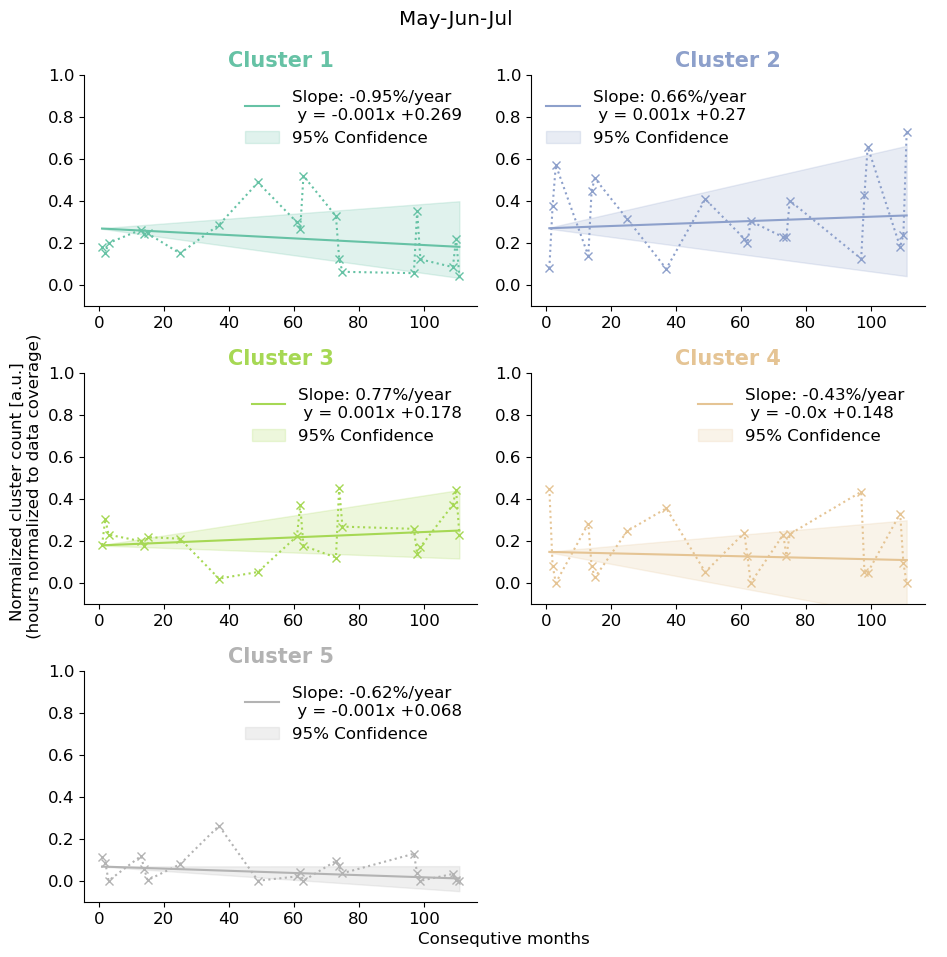

In [20]:
fu.plotThielSen(df_norm_MJJ, clusters,'May-Jun-Jul')

**Figure 6. The 2010-2020 May-June-July trend for cluster 1-5. The x-axis indicates the consequtive months starting from the first measurement point 2010. The (non-parametric) Thiel-Sen slope is used to estimate the trend.
The legend denotes the annual change in percentages and the y = kx + m shows the estimated decrease per month (k) and the initial estimated share of total normalized occurence (m).**

## NPF relation to sea ice concentration 

Our main aim was to make an attempt at reproducing the results from Dall'Osto et al. (2017) who put forward the hypothesis of an anti-correlation between sea ice extent and NPF frequency, i.e. that decreasing sea ice in the Barents and Greenland Sea promotes NPF. 
We investigated whether the anti-correlation holds true when more recent data is used from the Zeppelin station. Dall'Osto et al. (2017) investigated the years 2000-2010 and this part of our study encompass 2010-2017 as there was an overlap between DMPS data and sea ice satellite data for this period. 
Here, the annual sea ice concentration data (Kei's work) in the Barents and Greenland Sea is used instead of sea ice extent. We normalized the NPF observations to data coverage (in order to remove this dependence) from cluster 1 and 2 and use the annual sum of their frequency as those have been chosen as a proxy for NPF events. We also investigated the cluster 1 and 2  and their correlation to sea ice concentration in the region separately. First, the annual occurrence of cluster 1 and 2 is computed and the sea ice concentration data is loaded.

In [21]:
# Compute the monthly and yearly normalized count for all clusters
df_monthly_cluster_count = df_norm_all.copy(deep = True)
df_yearly_count_clusters = fu.DFAnnualCountNorm(df_norm_clustered_1h_mean,clusters)

# Compute the total normlized count for cluster 1 and 2 by adding extra column and removing other clusters (=3,4,5)
monthly_cluster_count_12, df_yearly_cluster_count_12 = fu.sumCluster12(df_monthly_cluster_count,df_yearly_count_clusters)
sea_ice_annual = fu.readSeaIcetoDF()

Figure 7 below shows the correlation of the total annual normalized cluster frequency (for cluster 1, 2 and their sum) for each year to sea ice concentration. The results shown below give little confidence in the hypothesis that NPF at Zeppelin is significantly anti-correlated with sea ice concentration in the studied region between 2010-2017 ($R^2$ = 0.31,0.34 and 0.37 respectively and $p$ = 0.16, 0.13 and 0.11). 
The p-value is the two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero (no correlation). 
The calculated p-values are enough to reject this null-hypothesis. At least not on a reasonable confidence level. There are several explanations that are possible for this. For example, the sample size is quite low, or there is simply no correlation between sea ice concentration in the studied region and NPF. 
This however that does not mean that changes in other NPF drivers have not occurred simultaneously or in other regions which have an effect on NPF drivers. Furthermore, it may be that the 1h-clusters we use here to study NPF related sizedistribution frequencies do not capture the NPF events properly.  

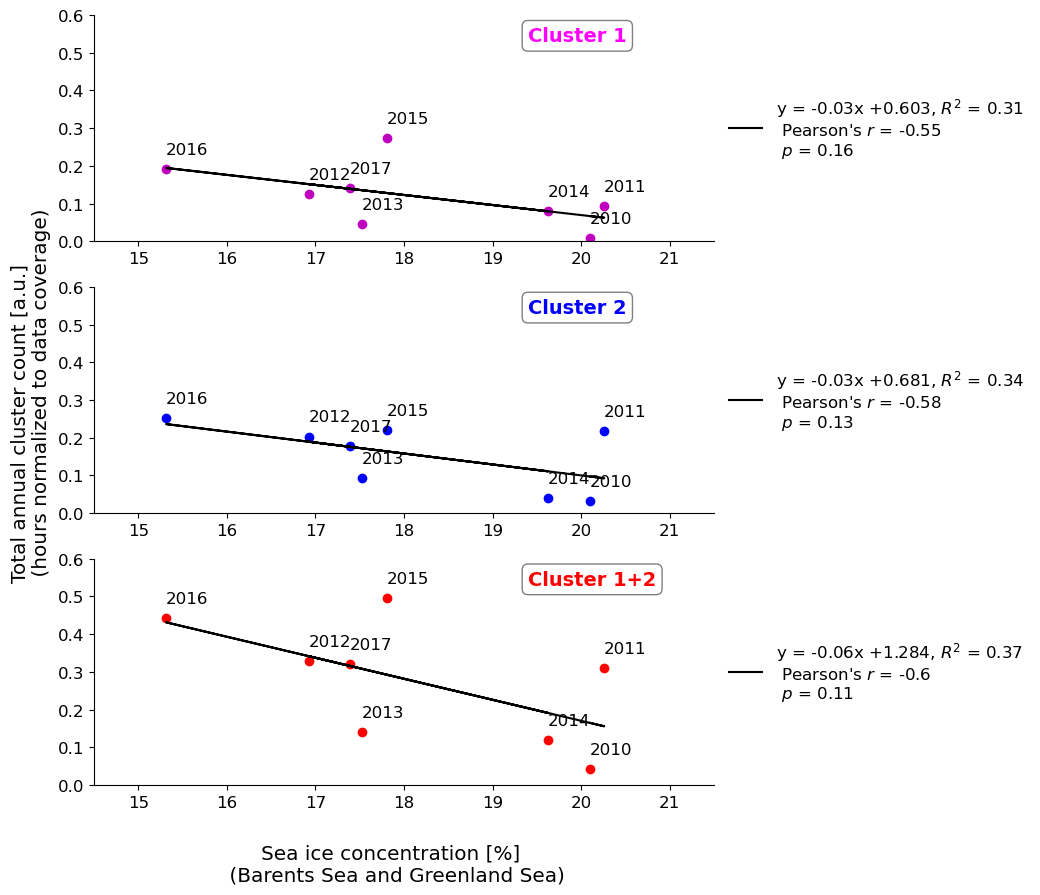

In [22]:
fu.plotNPFvsSeaIce(sea_ice_annual,df_yearly_cluster_count_12)

**Figure 7. The 2010-2017 (normalized) total annual frequency of cluster 1, 2 and their sum versus sea ice concentration in the Greenland and Barents Sea (data from Kei's work).**

# Discussion

NPF is an import source of CCN in the Arctic where clouds exert a net warming effect.  However, the process driving NPF, and cloud droplet response are complex (Birch et al., 2012). The main objective of this project was to examine if the conclusions from Dall’Osto et al. (2017) holds true for more recent years i.e., that there is a causal relationship between sea ice loss and NPF at the Zeppelin station. A second objective was to investigate different methods for the identification of NPF events. 

To investigate the effect of sea ice melt on NPF frequency, the identification of NPF events is crucial. Here, the K-means clustering presented a decent option along with the CPC methods which, despite large spread in the data in terms of standard deviaions and percentiles, maybe could be used for validation of the K-means method. Manual inspection of NPF events in the DMPS data is also advised to validate the K-means approach. However, using unsupervised machine learning provides little insight to the actual clustering procedure. Two metrics were used to evaluate the performance of the clustering, but several others are available which might affect the choice of $k$. 
The Dunn Index for example provides information about how compact and well separated the clusters are.

In this work we calculated the inertia and average silhouette score, but the results were hard to clearly draw conclusions on the optimal cluster number from. Furthermore, increasing the cluster number decrease the inertia and average Silhouette score. It could be that these in our case were calculated wrong or, that DMPS data is not suitable for K-means cluster over long time periods where there is risk that clusters represent the overall seasonality instead (see Figure S1 and S2 in Supplement). We also note that Dall'Osto et al. (2017) and later Dall'Osto et al. (2018) at Villum Research Station, chose an optimal but higher cluster number from their analysis, but condensed the number of clusters by merging the clusters together manually by matching the size distributions and time series, which might be beneficial.

We found no evidence of an anti-correlation between NPF and sea ice concentration, despite a decrease of sea ice in the Barents Sea for the years 2000-2017 (Kei's work). For the Greenland sea we observed no or little decrease. A direct comparison is impaired by the different years Dall’Osto et al.’s study and ours target. The relationship between NPF and air mass origin is also something that needs to be accounted for, as marine air masses that contribute to NPF may come from regions unaffected by sea ice melt. Mixed and spatially heterogenous trends in chlorophyll satellite data which is indicator of microbiological activity (and source of NPF precursor gases) emphasizes the need for back trajectory analysis in our work. The study of airmass back trajectories is further encouraged as the majority of the airmasses that resulted in NPF related size distributions in Dall'Osto et al. (2017) origined from the South and South-West, where we saw little or now decrease in our sea ice satellite data from 2000-2017 (Kei's work).

To us it remains unclear if the results produced by Dall'Osto et al. (2017) used hourly clustered data or daily. We interpreted their finding of NPF events (given in hours) and sea ice extent being anti-correlated as a result of using hourly clustered data, and thus applied a similar approach. However, NPF events tend to occur once a day and therefore it might be beneficial to study the correlation of NPF days to sea ice extent in our project. For *k* = 5 clusters, the daily median clusters looked similar in terms of shape (Figure S3 in Supplement).   

Even though the clustering method may not be optimal, the results present some interesting features in terms of summertime trends. Cluster 3 has become increasingly frequent over the period, it could be speculated (if we trust our cluster analysis) that cluster 3 would provide an additional condensation sink which supress the MJJ NPF (cluster 1, the most likely NPF related candidate, has experienced a decreased occurrence for example). Studies on airmass origin and other processes that might affect the composition and properties Arctic submicron aerosols are needed to decipher the NPF controlling factors at the Zeppelin Observatory.


# Conclusions and outlook
We observed weak trends for individual DMPS clusters, and no significant anti-correlation of NPF to sea ice concentration in the Barents and Greenland Sea (for cluster 1,2 and their sum). As Kei found that trends are spatially heterogeneous for chlorophyll and sea ice concentration, back trajectory analysis would provide valuable insight into the driving forces behind NPF events at Zeppelin in a rapidly warming Arctic.

For future work a more careful cluster analyis is advised, for example by using more clusters and merging the clusters. On the other hand, it appears as clustering of longterm DMPS data may not be the best approach, other methods are advised. Looking into to other changes in the Arctic environment (airmass origin, biomass burning etc.) that has affected the sizedistribution properties over the last twenty years could also help with the task of identifying what drives NPF at Zeppelin.

# References

Beck, L. J., Sarnela, N., Junninen, H., Hoppe, C. J. M., Garmash, O., Bianchi, F., et al. (2021). Differing mechanisms of new particle formation at two Arctic sites. Geophysical Research Letters, 48, e2020GL091334. https://doi.org/10.1029/2020GL091334

Birch, C. E., Brooks, I. M., Tjernström, M., Shupe, M. D., Mauritsen, T., Sedlar, J., ... & Leck, C. (2012). Modelling atmospheric structure, cloud and their response to CCN in the central Arctic: ASCOS case studies. Atmospheric Chemistry and Physics, 12(7), 3419-3435.

Dall´Osto, M., Beddows, D., Tunved, P. et al. Arctic sea ice melt leads to atmospheric new particle formation. Sci Rep 7, 3318 (2017). https://doi.org/10.1038/s41598-017-03328-1

Dall'Osto, M., Geels, C., Beddows, D. C. S., Boertmann, D., Lange, R., Nøjgaard, J. K., et al. (2018). Regions of open water and melting sea ice drive new particle formation in North East Greenland. Scientific Reports, 8, 1–10. https://doi.org/10.1038/s41598-018-24426-8

Galí, M., Devred, E., Babin, M., & Levasseur, M. (2019). Decadal increase in Arctic dimethylsulfide emission. Proceedings of the National 
Academy of Sciences of the United States of America, 116(39), 19311–19317. https://doi.org/10.1073/pnas.1904378116

Gordon, H., Kirkby, J., Baltensperger, U., Bianchi, F., Breitenlechner, M., Curtius, J., et al. (2017). Causes and importance of new parti-
cle formation in the present-day and preindustrial atmospheres. Journal of Geophysical Research: Atmospheres, 122(16), 8739–8760. 
https://doi.org/10.1002/2017JD026844

Mauritsen, T., Sedlar, J., Tjernström, M., Leck, C., Martin, M., Shupe, M., et al. (2011). An Arctic CCN-limited cloud-aerosol regime. Atmos-
pheric Chemistry and Physics, 11(1), 165–173. https://doi.org/10.5194/acp-11-165-2011

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.

Perovich, D., Meier, W., Tschudi, M., Farrell, S., Hendricks, S., Gerland, S., ... & Webster, M. (2018). Sea ice. NOAA Arctic Report Card.

Schmale, J., & Baccarini, A. (2021). Progress in unraveling atmospheric new particle formation and growth across the Arctic. Geophysical Research Letters, 48(14), e2021GL094198.

Seinfeld, J., & Pandis, S. (2008). Atmospheric chemistry and physics. 1997. New York.

Tunved, P., Ström, J. & Krejci, R. Arctic aerosol life cycle: linking aerosol size distributions observed between 2000 and 2010 with air mass transport and precipitation at Zeppelin station, Ny-Ålesund, Svalbard. Atmos. Chem. Phys. 13, 3643–3660 (2013).

# Supplement

## Comparision between clusters and seasonal and annual cycle of DMPS data

The clusters may represent the overall seasonal variation in the data rather than actual features in terms of processes and sources leading to a certain size distribution. Therefore, it could be interesting to plot the normalized clustered 1h-data together with the seasonal median of the normalized DMPS data (2010-2020), for both single months and seasons. 
Figure S1 (top panel) shows the median and 10-90 percentiles of the DMPS data (1h-resolution) for different seasons. Overall, all seasonal medians display bimodality of varying extent. All seasons appear to have a mode present around 30 nm. In DJF and MAM, the size distribution peak in the accumulation mode. During DJF the peak occurs for the largest particle sizes in comparison with the rest of the seasons. It could also be noted that DJF and MAM are similar in terms of shape of the distribution, although the magnitude may differ (not visible as the data is normalized). In JJA on the other hand, the size distribution peaks at around 30 nm and the distribution is clearly bimodal for this season as well. For the autumn months (SON) the size distribution peak shifts from the ultrafine to the accumulation mode, but the contribution from the ultrafine particles is still visible.

In the bottom panel of Figure S1, the median clusters of the normalized data are plotted together with the median normalized DMPS distributions. As seen in Figure 3, all clusters display bimodality, just like the seasonal median distributions. 

Cluster 2 peaks at similar diameter as JJA, as opposed to the peak of cluster 1 which occurs for the smallest particle sizes although it too displays a tail into the accumulation mode. The accumulation mode clusters (4 and 5) appear to qualitatively resemble to the median size distributions of DJF and MAM. The overall shape of cluster 3 is not similar any specific season although it on the left side bear similarity to the lefthand side of JJA median and SON on the right side. 
Overall, all clusters display bimodality as well as all seasons, and partly the clusters agree well with the seasonal distributions. There is therefore reason to believe that the clusters may be indicative of the overall seasonality of the size distribution, but further investigation is likely needed to conclude this.


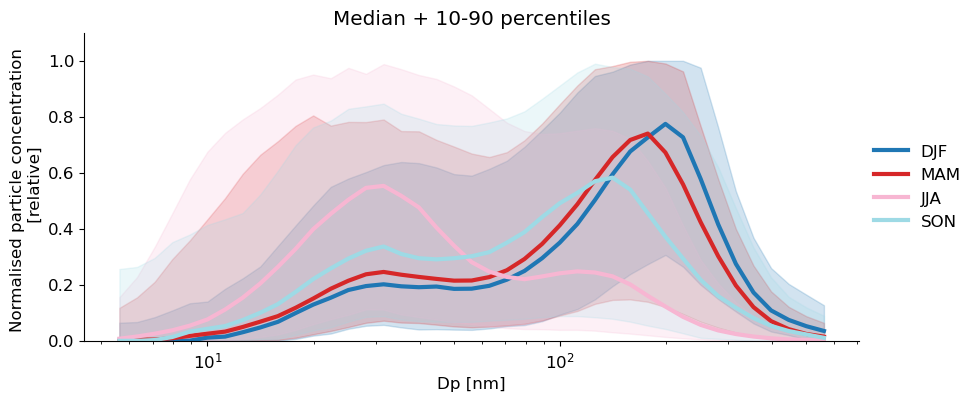

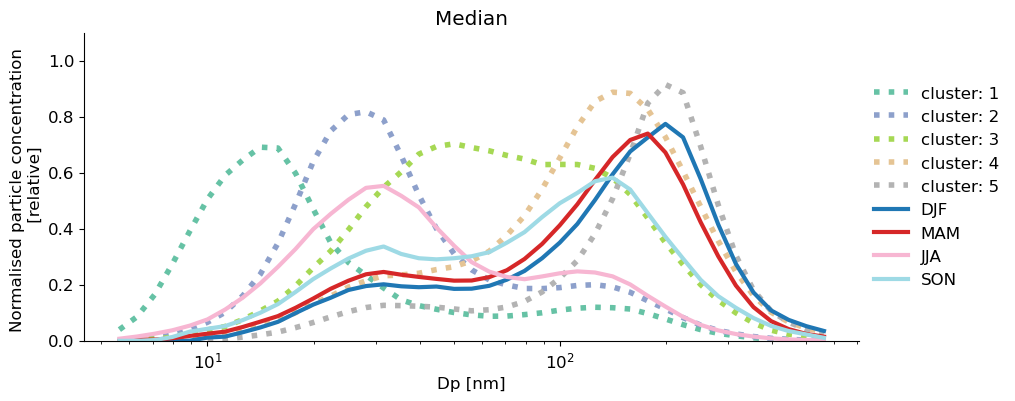

In [23]:
# Plot for seasons different seasons (DJF, MAM, JJA, SON)
fu.makeSeasonalSizeDistPlot(df_hourly_norm_dropped,diameters[1:-2],df_norm_clustered_1h_mean_median,clusters,False,True)

**Figure S1. The top panel shows the median clusters (dashed lines) and 10,90 percentiles of the DMPS data (1h-resolution) for different seasons between 2010-2020 (solid lines). The bottom panel shows the median clusters togeteher with the median of the DMPS data (1h-resolution) for different seasons between 2010-2020.**

Figure S2 displays the same as Figure S1 but instead of seasons, individual monthly median normalized size distributions are shown. The upper panel is like the upper panel of Figure S1, but here more details can be seen in the seasonal shift of the median size distribution. Cluster 3 still displays no similarity to any of the monthly median distributions, and cluster 4 and 5 are likely representing the Arctic haze related episodes. In the lower panel of Figure S2, cluster 2 appears to be a good representative of the general summertime distribution, but for cluster 1 the peak between 10 and 20 nm still remains clearly distinguished from other monthly median distributions.

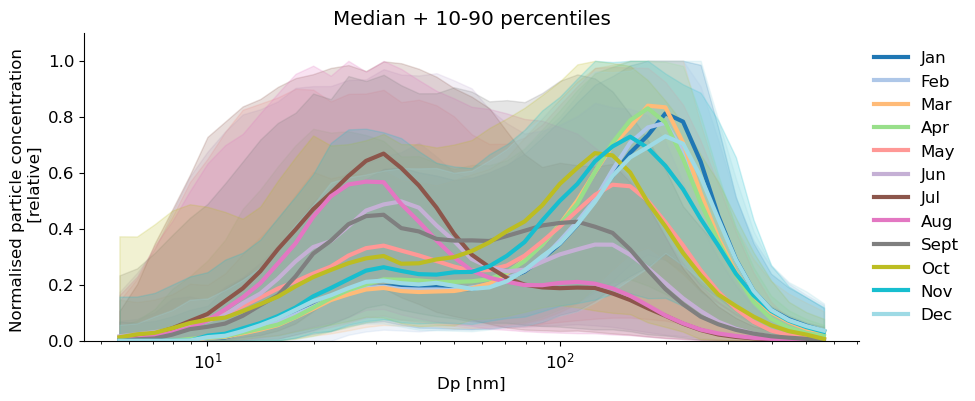

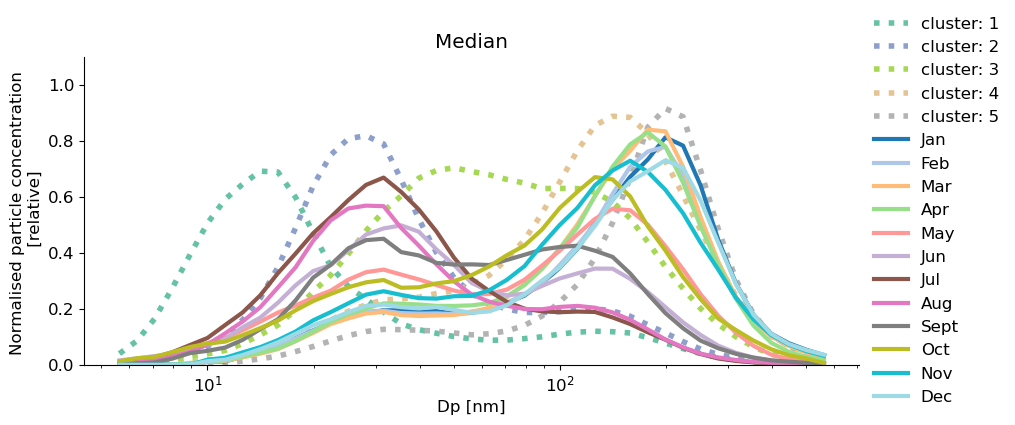

In [24]:
# Plot for each month
fu.makeSeasonalSizeDistPlot(df_hourly_norm_dropped,diameters[1:-2],df_norm_clustered_1h_mean_median,clusters,True,False)

**Figure S2. The top panel shows the median clusters (dashed lines) and 10,90 percentiles of the DMPS data (1h-resolution) for all months between 2010-2020 (solid lines). The bottom panel shows the median clusters togeteher with the median of the DMPS data (1h-resolution) for all months between 2010-2020.**

## Daily median clusters
 First the daily median data must be normalized before the clustering takes place.

In [25]:
df_daily_2010_2020_median = df_DMPS.resample('D').median()
# drop NaN's that resample pads missing data with
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 

# Normalize the dataframe
df1, df_daily_2010_2020_median_norm = fu.create_normalised_df(df_daily_2010_2020_median)
# Cluster the dataframe 
avSilDaily, inertaDaily, df_norm_clustered_median = fu.perform_clustering(df_daily_2010_2020_median_norm, n_clusters)

Figure S3 displays a comprision of the daily median clusters (median+10-90 percentile) and the median of the 1h-clusters. The peak is shifted to somewhat larger sizes for the smallest 1h-clusters, otherwise they are similar in terms of shape. However the cluster number was not optimized for daily clusters.  

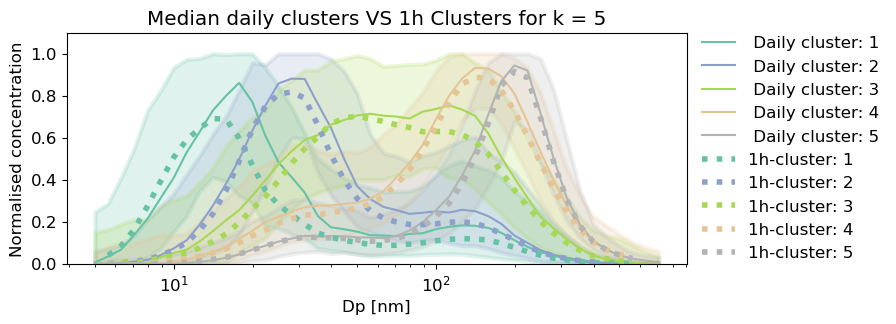

In [26]:
fu.plotMedianClusters(df_norm_clustered_median,diameters,n_clusters,clusters,df_norm_clustered_1h_mean_median)

**Figure S3. Median 1h cluster indicated as dotted lines and median daily clusters as solid lines. Shaded regions show the 10,90 percentile**